# <span style="color:red"><b>TOURNE SUR PC</b></span>
# Translations with Ecoder Decoder

We'll see that with LSTMs and the Encoder Decoder framework, we can do some pretty powerful things like: *translators* ! Let's see how we can create a French > English translator with TensorFlow 

### Tips 

Don't take the whole dataset at the beginning for your experiments, just take 5000 or even 3000 sentences. This will allow you to iterate faster and avoid bugs simply related to your need for computing power.

Let's get started!

## Import Libraries

In [1]:
import pandas as pd
# import tensorflow_datasets as tfds
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model


print(pd.__version__)
print(tf.__version__)

2.2.1
2.10.0


## Importing data 

1. Load the data using the following url https://go.aws/38ECHUB you can read this using `pd.read_csv` with the `"\t"` delimiter and `header=None`

In [2]:
# Loading document txt function
df = pd.read_csv("https://go.aws/38ECHUB", delimiter="\t", header=None)
display(df)

,0,1
0,Go.,Va !
1,Hi.,Salut !
2,Run!,Cours !
3,Run!,Courez !
4,Wow!,Ça alors !
...,...,...
160533,A carbon footprint is the amount of carbon dio...,Une empreinte carbone est la somme de pollutio...
160534,Death is something that we're often discourage...,La mort est une chose qu'on nous décourage sou...
160535,Since there are usually multiple websites on a...,Puisqu'il y a de multiples sites web sur chaqu...
160536,If someone who doesn't know your background sa...,Si quelqu'un qui ne connaît pas vos antécédent...


2. Create an object `doc` containing the first 5000 rows from the file.

In [3]:
doc = df.iloc[:5_000,:]
doc.columns=["uk", "fr"]
display(doc)

,uk,fr
0,Go.,Va !
1,Hi.,Salut !
2,Run!,Cours !
3,Run!,Courez !
4,Wow!,Ça alors !
...,...,...
4995,I am so sorry.,Je suis tellement désolé !
4996,I am so sorry.,Je suis tellement désolée !
4997,I am very sad.,Je suis très triste.
4998,I ate a donut.,J'ai mangé un beignet.


3. In your opinion, are we going to need to lemmatize and remove stop words for a translation problem?

No 

4. Add the word `<start>` to the beginning of each target sentence in order to create a new column named `padded_en`

In [1]:
doc["padded_en"] = doc["uk"].apply(lambda str_in: "<start> " + str_in)
display(doc.head(25))

NameError: name 'doc' is not defined

5. Create two objects : `tokenizer_fr` and `tokenizer_en` that will be instances of the `tf.keras.preprocessing.text.Tokenizer` class. 

Be careful! Since we added a special token containing special characters, make sure you setup the tokenizers right so this token is well interpreted! (use the `filters` argument for example).

In [5]:
tokenizer_fr = tf.keras.preprocessing.text.Tokenizer()
# tokenizer_en = tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')
tokenizer_en = tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;?@[\\]^_`{|}~\t\n')

6. Fit the tokenizers on the french, and **padded** english sentences respectively.

In [6]:
tokenizer_fr.fit_on_texts(doc["fr"])
tokenizer_en.fit_on_texts(doc["padded_en"])

7. Create three new columns in your Dataframe for the encoded french, english, and padded english sentences.

In [7]:
doc["fr_idx"] = tokenizer_fr.texts_to_sequences(doc.iloc[:,1])
doc["uk_idx"] = tokenizer_en.texts_to_sequences(doc.iloc[:,0])
doc["uk_idx_pad"] = tokenizer_en.texts_to_sequences(doc["padded_en"])

display(doc.head(25))

C:\Users\phili\AppData\Local\Temp\ipykernel_22560\1608629783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doc["fr_idx"] = tokenizer_fr.texts_to_sequences(doc.iloc[:,1])
C:\Users\phili\AppData\Local\Temp\ipykernel_22560\1608629783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doc["uk_idx"] = tokenizer_en.texts_to_sequences(doc.iloc[:,0])
C:\Users\phili\AppData\Local\Temp\ipykernel_22560\1608629783.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,uk,fr,padded_en,fr_idx,uk_idx,uk_idx_pad
0,Go.,Va !,<start> Go.,[36],[11],"[1, 11]"
1,Hi.,Salut !,<start> Hi.,[404],[616],"[1, 616]"
2,Run!,Cours !,<start> Run!,[1212],[111],"[1, 111]"
3,Run!,Courez !,<start> Run!,[1213],[111],"[1, 111]"
4,Wow!,Ça alors !,<start> Wow!,"[22, 1214]",[872],"[1, 872]"
5,Fire!,Au feu !,<start> Fire!,"[90, 335]",[289],"[1, 289]"
6,Help!,À l'aide !,<start> Help!,"[16, 1215]",[81],"[1, 81]"
7,Jump.,Saute.,<start> Jump.,[709],[350],"[1, 350]"
8,Stop!,Ça suffit !,<start> Stop!,"[22, 1216]",[51],"[1, 51]"
9,Stop!,Stop !,<start> Stop!,[1217],[51],"[1, 51]"


8. We learned from the tutorial that the padded target sequences need to have the same length as the target sequences, so we will remove the last element of each padded target sequence (this will help us enforce teacher forcing)

In [8]:
doc["uk_idx_pad_clean"] = doc["uk_idx_pad"].apply(lambda x: x[:-1])
display(doc.head(25))

C:\Users\phili\AppData\Local\Temp\ipykernel_22560\968738385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doc["uk_idx_pad_clean"] = doc["uk_idx_pad"].apply(lambda x: x[:-1])


,uk,fr,padded_en,fr_idx,uk_idx,uk_idx_pad,uk_idx_pad_clean
0,Go.,Va !,<start> Go.,[36],[11],"[1, 11]",[1]
1,Hi.,Salut !,<start> Hi.,[404],[616],"[1, 616]",[1]
2,Run!,Cours !,<start> Run!,[1212],[111],"[1, 111]",[1]
3,Run!,Courez !,<start> Run!,[1213],[111],"[1, 111]",[1]
4,Wow!,Ça alors !,<start> Wow!,"[22, 1214]",[872],"[1, 872]",[1]
5,Fire!,Au feu !,<start> Fire!,"[90, 335]",[289],"[1, 289]",[1]
6,Help!,À l'aide !,<start> Help!,"[16, 1215]",[81],"[1, 81]",[1]
7,Jump.,Saute.,<start> Jump.,[709],[350],"[1, 350]",[1]
8,Stop!,Ça suffit !,<start> Stop!,"[22, 1216]",[51],"[1, 51]",[1]
9,Stop!,Stop !,<start> Stop!,[1217],[51],"[1, 51]",[1]


9. It's rather difficult to work with sequences with variable length, use zero-padding to normalize the length of all the sequences in each category.

In [9]:
# Use of Keras to create token sequences of the same length
fr_idx_pad = tf.keras.preprocessing.sequence.pad_sequences(doc["fr_idx"], padding="post")
uk_idx_pad = tf.keras.preprocessing.sequence.pad_sequences(doc["uk_idx"], padding="post")
teacher = tf.keras.preprocessing.sequence.pad_sequences(doc["uk_idx_pad_clean"], padding="post")

10. What are the shapes of the arrays you just created for the french, padded english, and english sentences?

In [10]:
# Visualization of the shape of one of the tensors
fr_idx_pad.shape

(5000, 10)

In [11]:
uk_idx_pad.shape

(5000, 4)

In [12]:
teacher.shape

(5000, 4)

11. Use `sklearn` `train_test_split` function to divide your sample into train and validation sets.

In [13]:

uk_train, uk_val, fr_train, fr_val, teacher_train, teacher_val =  train_test_split(uk_idx_pad, fr_idx_pad, teacher, test_size=0.3)

## MODEL

Now it's time to code the model, thankfully you can largely base yourself off the code provided during the demo!

1. Create the following variables:
* `n_embed` the number of dimensions you want for the embeddings output spaces
* `n_lstm` the number of units you want for the lstm layers
* `fr_len` the length of a french sentence
* `en_len` the length of an english or teacher forcing sentence
* `vocab_size_fr` the number of tokens in the french vocabulary
* `vocab_size_en` the number of tokens in the english vocabulary (based of the padded sequences so the `<start>` is included!

In [14]:
# let's start by defining the number of units needed for the embedding and
# the lstm layers

n_embed       = 128
n_lstm        = 64
fr_len        = fr_idx_pad.shape[1]
en_len        = uk_idx_pad.shape[1]
vocab_size_fr = len(tokenizer_fr.word_index)
vocab_size_en = len(tokenizer_en.word_index)

2. Set up the encoder

This will work in the same way as the demo, just make sure the input dimension of the embedding is equal to the number of words in the french vocabulary +1 (for the zero-padding)

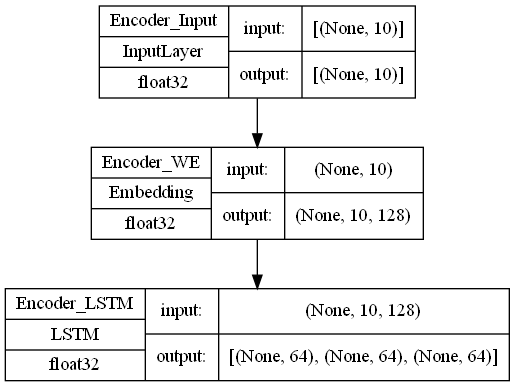

In [15]:
# DECLARATION DES COUCHES ###############
encoder_input = tf.keras.Input(shape=(fr_len), name = "Encoder_Input")
encoder_embed = tf.keras.layers.Embedding(input_dim = vocab_size_fr+1, output_dim = n_embed, name = "Encoder_WE")
encoder_lstm  = tf.keras.layers.LSTM(n_lstm, return_state = True, name = "Encoder_LSTM")

# CABLAGE DES COUCHES ###################
encoder_embed_ouput = encoder_embed(encoder_input)
encoder_output      = encoder_lstm(encoder_embed_ouput)

encoder = tf.keras.Model(inputs = encoder_input, outputs = encoder_output)
plot_model(encoder, show_shapes=True, show_dtype=True, show_layer_names=True)

3. Try the encoder on the french train data (using the call method)

In [16]:
encoder(fr_train)

[<tf.Tensor: shape=(3500, 64), dtype=float32, numpy=
 array([[-0.03099965, -0.02097657, -0.03207578, ..., -0.00090118,
         -0.01062773, -0.00451932],
        [-0.02937253, -0.02148256, -0.0325061 , ..., -0.00061442,
         -0.01120687, -0.00502198],
        [-0.03008141, -0.02131079, -0.03183288, ..., -0.00423126,
         -0.00891854, -0.00469688],
        ...,
        [-0.02901372, -0.01938278, -0.03124172, ...,  0.00019905,
         -0.01054814, -0.00309532],
        [-0.02066668, -0.01857453, -0.02284167, ...,  0.00079557,
         -0.00605601, -0.00171648],
        [-0.03104839, -0.0222317 , -0.03421304, ..., -0.00371864,
         -0.01106658, -0.00568152]], dtype=float32)>,
 <tf.Tensor: shape=(3500, 64), dtype=float32, numpy=
 array([[-0.03099965, -0.02097657, -0.03207578, ..., -0.00090118,
         -0.01062773, -0.00451932],
        [-0.02937253, -0.02148256, -0.0325061 , ..., -0.00061442,
         -0.01120687, -0.00502198],
        [-0.03008141, -0.02131079, -0.03183288,

4. Set up the decoder

This will work in the same way as the demo, just make sure the input dimension of the embedding is equal to the number of words in the english vocabulary +1 (for the zero-padding). The same goes for the last Dense layer!

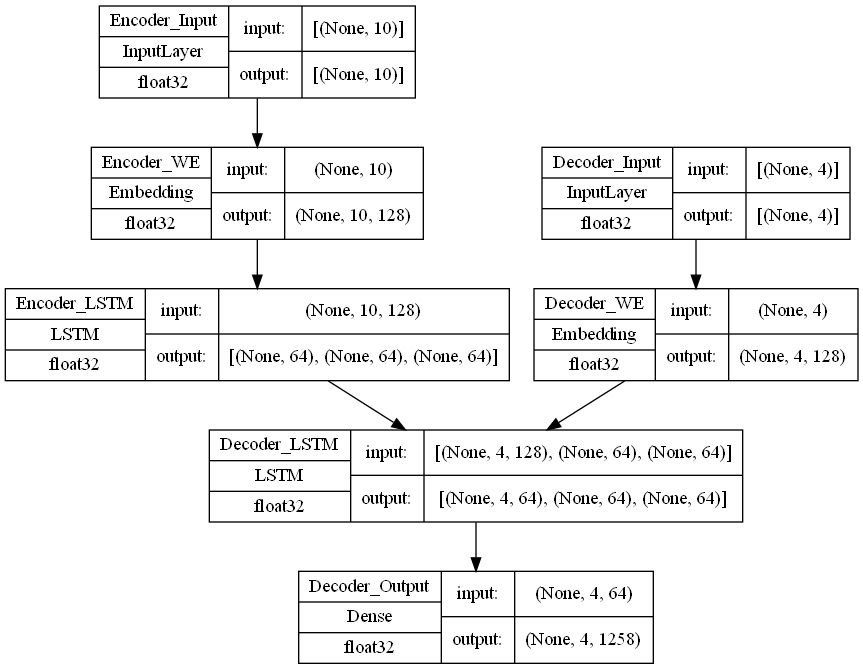

In [17]:
decoder_input = tf.keras.Input(shape=(en_len), name="Decoder_Input")
decoder_embed = tf.keras.layers.Embedding(input_dim=vocab_size_en+1, output_dim=n_embed, name="Decoder_WE")
decoder_lstm  = tf.keras.layers.LSTM(n_lstm, return_sequences=True, return_state=True, name="Decoder_LSTM")
decoder_pred  = tf.keras.layers.Dense(vocab_size_en+1, activation="softmax", name="Decoder_Output")

decoder_embed_output = decoder_embed(decoder_input) # teacher forcing happens here
# the decoder input is actually the padded target we created earlier, remember
# if target is: [91, 47, 89, 21, 62]
# the decoder input will be: [0, 91, 47, 89, 21]
decoder_lstm_output, _, _ = decoder_lstm(decoder_embed_output, initial_state=encoder_output[1:])
# in the step described above the decoder receives the encoder state as its
# initial state.
decoder_output = decoder_pred(decoder_lstm_output)
# then the dense layer will convert the vector representation for each element
# in the sequence into a probability distribution across all possible tokens
# in the vocabulary!

decoder = tf.keras.Model(inputs = [encoder_input, decoder_input], outputs = decoder_output)
plot_model(decoder, show_shapes=True, show_dtype=True, show_layer_names=True)

# all we need to do is put the model together using the input output framework!


5. Try the decoder on the french train data and the teacher forcing data

In [18]:
decoder([fr_train,teacher_train])

<tf.Tensor: shape=(3500, 4, 1258), dtype=float32, numpy=
array([[[0.00079052, 0.00079383, 0.00078876, ..., 0.00079021,
         0.00079072, 0.00080295],
        [0.00079046, 0.00079332, 0.00079178, ..., 0.0007943 ,
         0.00078985, 0.00080233],
        [0.00078976, 0.00079069, 0.00079362, ..., 0.00079466,
         0.00079215, 0.00079968],
        [0.0007918 , 0.00079201, 0.00079496, ..., 0.00079504,
         0.00078921, 0.00079865]],

       [[0.00079067, 0.0007936 , 0.0007889 , ..., 0.0007904 ,
         0.00079113, 0.00080289],
        [0.00079049, 0.00079219, 0.0007918 , ..., 0.00079205,
         0.00079065, 0.00079793],
        [0.00079187, 0.0007926 , 0.00079346, ..., 0.0007928 ,
         0.00078769, 0.00079765],
        [0.00079316, 0.00079317, 0.00079479, ..., 0.00079332,
         0.00078561, 0.00079716]],

       [[0.00079096, 0.000794  , 0.00078876, ..., 0.00079041,
         0.00079072, 0.00080284],
        [0.00079257, 0.00079511, 0.00079126, ..., 0.0007908 ,
         0.00

6. Set up the inference decoder

The code here will be identical to the one from the demo except if you changed some naming conventions!

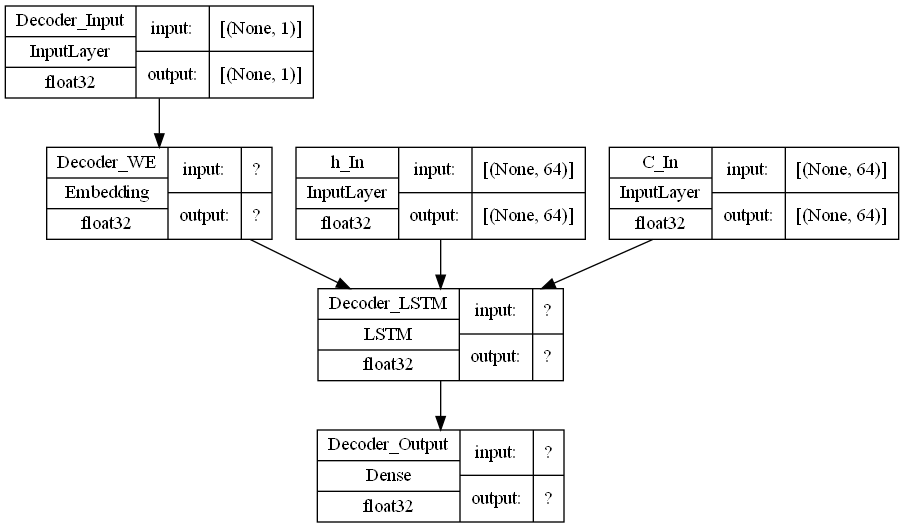

In [19]:
decoder_state_input_h = tf.keras.Input(shape=(n_lstm,), name="h_In")
decoder_state_input_c = tf.keras.Input(shape=(n_lstm,), name="C_In")
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
# at the first step of the inference, these input will be respectively the
# hidden state and C state of the encoder model
# for following steps, they will become the hidden and C state from the decoder
# itself since the input sequence is unknown we will have to predict step by step
# using a loop

# the decoder input here is of shape 1 because we will feed the elements in the sequence one by one
decoder_input_inf    = tf.keras.Input(shape=(1), name="Decoder_Input")
decoder_embed_output = decoder_embed(decoder_input_inf)

# the lstm layer works in the same way, the output from the embedding is used and the decoder state is used as described above
decoder_outputs, state_h, state_c = decoder_lstm(decoder_embed_output, initial_state=decoder_states_inputs)

# we store the lstm states in a specific object as we'll have to use them as initial state for the next inference step
decoder_states = [state_h, state_c]

# the lstm output is then converted to a probability distribution over the target vocabulary
decoder_outputs = decoder_pred(decoder_outputs)

decoder_inf = tf.keras.Model(inputs = [decoder_input_inf, decoder_states_inputs], outputs = [decoder_outputs, decoder_states])
plot_model(decoder_inf, show_shapes=True, show_dtype=True, show_layer_names=True)


7. Compile the decoder (the training version) using the appropriate loss and metric functions.

In [20]:
decoder.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss      = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics   = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

8. Train the decoder for 50 epochs, this should take 10 minutes. Is there overfitting ?

In [21]:
decoder.fit(x=[fr_train, teacher_train], y=uk_train, epochs=50, validation_data=([fr_val, teacher_val], uk_val))

Epoch 1/50
110/110 [==============================] - 6s 24ms/step - loss: 4.9483 - sparse_categorical_accuracy: 0.3464 - val_loss: 3.9455 - val_sparse_categorical_accuracy: 0.3527
Epoch 2/50
110/110 [==============================] - 2s 15ms/step - loss: 3.6835 - sparse_categorical_accuracy: 0.3861 - val_loss: 3.6103 - val_sparse_categorical_accuracy: 0.3970
Epoch 3/50
110/110 [==============================] - 1s 14ms/step - loss: 3.4896 - sparse_categorical_accuracy: 0.3986 - val_loss: 3.5138 - val_sparse_categorical_accuracy: 0.3975
Epoch 4/50
110/110 [==============================] - 1s 13ms/step - loss: 3.3883 - sparse_categorical_accuracy: 0.4039 - val_loss: 3.4393 - val_sparse_categorical_accuracy: 0.4077
Epoch 5/50
110/110 [==============================] - 2s 14ms/step - loss: 3.3005 - sparse_categorical_accuracy: 0.4151 - val_loss: 3.3639 - val_sparse_categorical_accuracy: 0.4218
Epoch 6/50
110/110 [==============================] - 2s 14ms/step - loss: 3.2058 - sparse_cate

9. Adapt the code from the demo to make some predictions on the validation data.

Be careful, in the demo the starting index for the teacher forcing sequences was 0, what index is the starting point of the teacher forcing sequences now?

Set up the first decoder input with the right dimension too!

In [22]:
enc_input = fr_val
#classic encoder input

dec_input = tf.ones(shape=(len(fr_val),1))
# the first decoder input is the special token 0

enc_out, state_h_inf, state_c_inf = encoder(enc_input)
# we compute once and for all the encoder output and the encoder
# h state and c state

dec_state = [state_h_inf, state_c_inf]
# The encoder h state and c state will serve as initial states for the
# decoder

pred = []  # we'll store the predictions in here

# we loop over the expected length of the target, but actually the loop can run
# for as many steps as we wish, which is the advantage of the encoder decoder
# architecture
for i in range(en_len):
  dec_out, dec_state = decoder_inf([dec_input, dec_state])
  # the decoder state is updated and we get the first prediction probability 
  # vector
  decoded_out = tf.argmax(dec_out, axis=-1)
  # we decode the softmax vector into and index
  pred.append(decoded_out) # update the prediction list
  dec_input = decoded_out # the previous pred will be used as the new input

pred = tf.concat(pred, axis=-1).numpy()
for i in range(10):
  print("pred:", pred[i,:])
  print("true:", uk_val[i,:])
  print("\n")

pred: [  8  52 437  12]
true: [  8 429 418   0]


pred: [ 10 133  12  11]
true: [276 162   0   0]


pred: [152 121  21 577]
true: [ 49 173   0   0]


pred: [ 2 33 77 39]
true: [  2 964  78   0]


pred: [ 10   6 166  10]
true: [ 41 207   0   0]


pred: [ 60 132   4  68]
true: [  69 1252    5    0]


pred: [  2  66  72 313]
true: [  2  66 567   0]


pred: [ 41 163  10 125]
true: [ 10 185  34   0]


pred: [ 3 46 53 11]
true: [  3 119   0   0]


pred: [  3 256 436  77]
true: [  3 387   0   0]




10. Use the tokenizer to convert the target and predicted sequences back to text, what do you think of the translations?

In [23]:
print(pred)

[[  8  52 437  12]
 [ 10 133  12  11]
 [152 121  21 577]
 ...
 [ 14  54  53  32]
 [ 25   5 117   5]
 [  2  18 128  79]]


In [24]:
y_sample    = tokenizer_en.sequences_to_texts(uk_val)[:10]
pred_sample = tokenizer_en.sequences_to_texts(pred)[:10]

for i, j in zip(y_sample,pred_sample):
  print("true : ", i)
  print("pred : ", j)
  print("\n")

true :  he walks fast
pred :  he lost face me


true :  tom'll pay
pred :  tom left me go


true :  stay calm
pred :  hold still that lunch


true :  i assume so
pred :  i got busy in


true :  tom's mad
pred :  tom is quiet tom


true :  how about you
pred :  look at it out


true :  i want cash
pred :  i want one cares


true :  tom said no
pred :  tom's weak tom wrong


true :  i'm fat
pred :  i'm not home go


true :  i'm retired
pred :  i'm hit duty busy




11. Now that you reached the end of the exercise, go back to the beginning and increase the number of sentences your model will train on, this should significantly improve the quality of the predictions!